In [1]:
from scenario_class import Scenario
from plots_class import Plots
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.cm as cm


scenario_params = {"end_year": 2100,
                   "income_goal": 20000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "gdp_assumption": "constant_ratio", #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "semi_log_model" #this is a string and either (1) UN_medium, (2) semi_log_model (3) semi_log_model_elasticity for details see the scenario_class.py file  
            }

scenario_1 = Scenario(scenario_params)
#test = scenario_1.raw_data
scenario_1.compute_country_scenario_params()
scenario_1.run()

### Plot global quantities as a first check

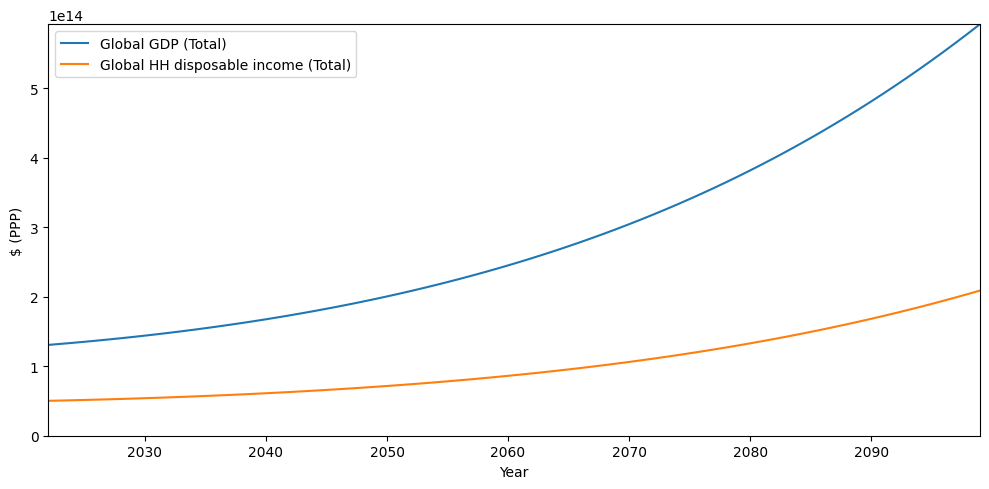

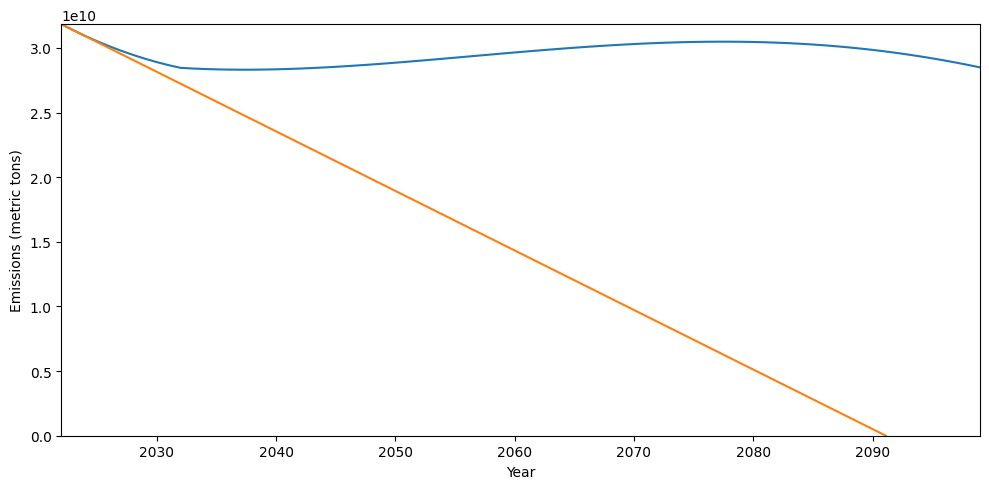

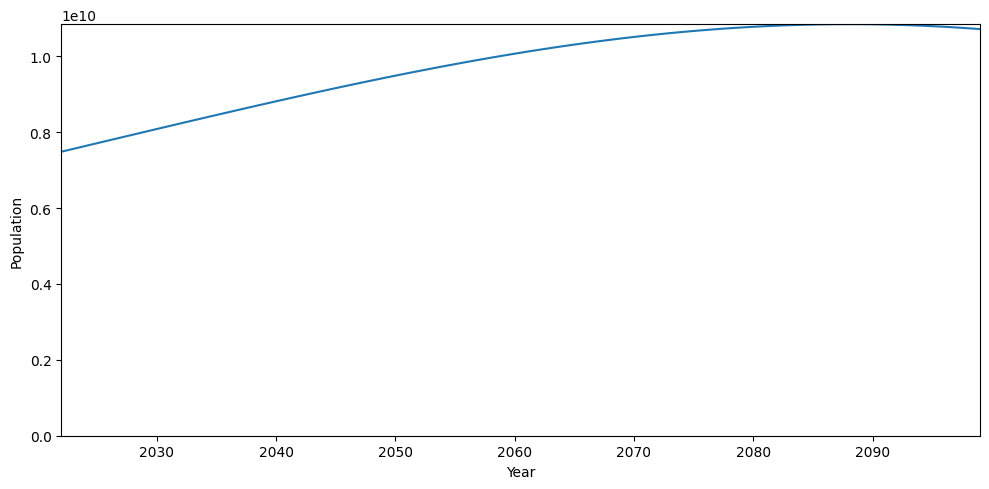

In [2]:
plotting_1 = Plots(scenario_1) # the current scenario must be passed to the plotting class to be able to plot the results
plotting_1.plot_global_economy()
plotting_1.plot_global_emissions()
plotting_1.plot_global_population()

#### Compute global gdp per capita average

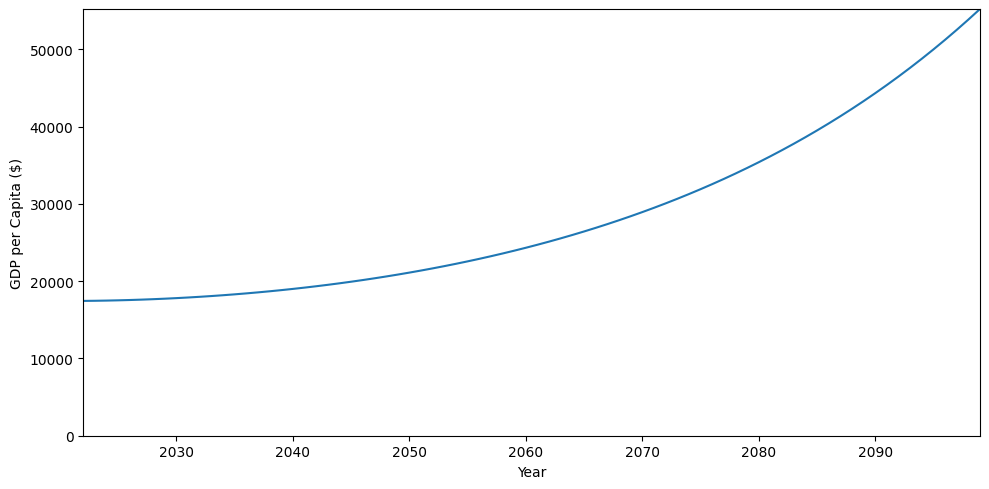

In [3]:
# Compute global gdp per capita average by dividing the global gdp by the global population for 2100 in the gdp trajectory and the pop trajectory
plotting_1.plot_global_gdp_per_capita()

### Plot example country, here the United States

[2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099]
[32471.366926206916, 32167.203833860345, 31868.432580345514, 31574.96244055222, 31286.704434288036, 31003.57132495476, 30725.47758643101, 30452.33937061914, 30184.074475643247, 29920.602314685482, 29661.843885448092, 29407.72174022887, 29158.159956597887, 28913.08410866374, 28672.421238917712, 28436.09983064442, 28204.049780887908, 27976.202373962187, 27752.49025549567, 27532.84740699885, 27317.20912094514, 27105.51197635466, 26897.693814871345, 26693.693717323367, 26493.451980757913, 26296.910095940497, 26104.01072531024, 25

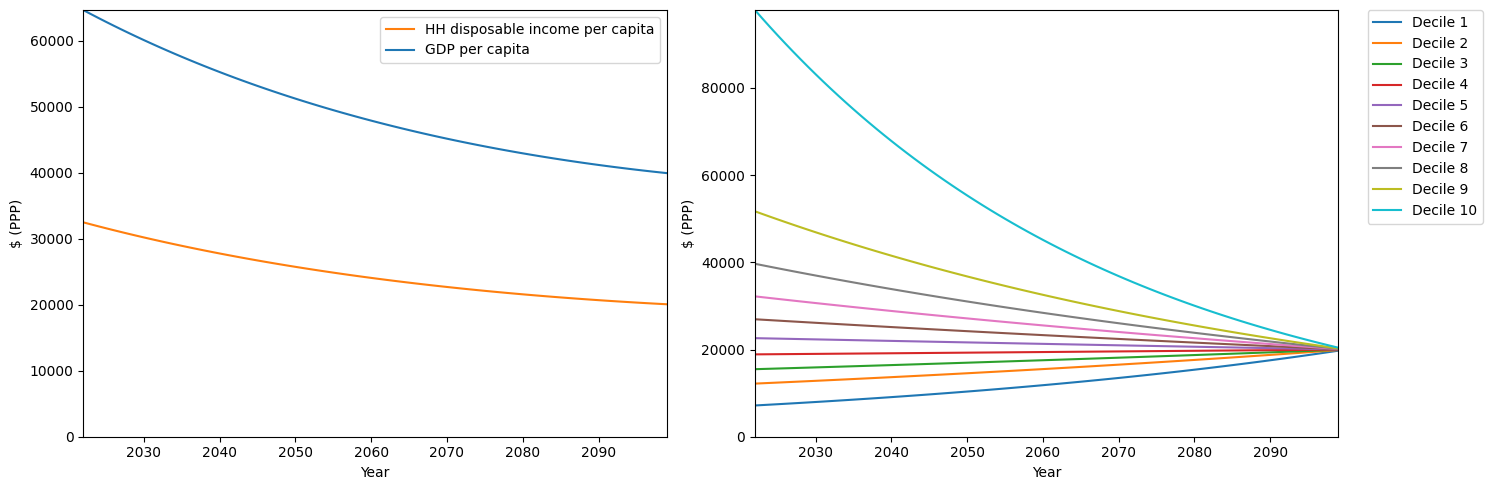

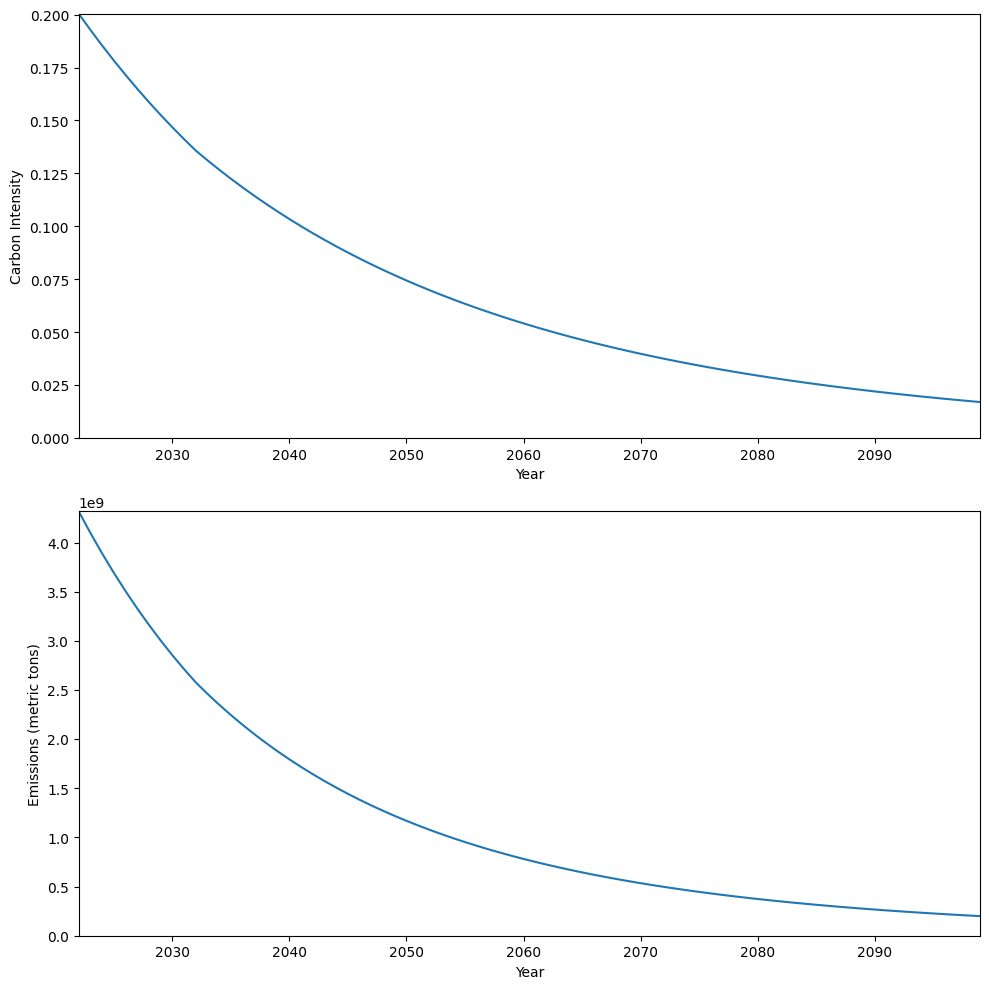

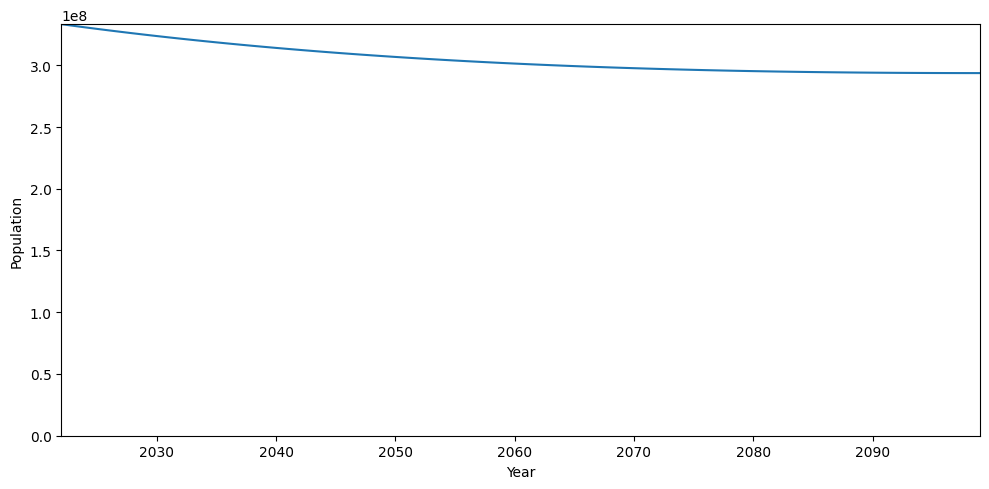

In [4]:
test_country = "United States"
plotting_1.plot_country_economy(test_country)
plotting_1.plot_country_emissions(test_country)
plotting_1.plot_country_population(test_country)

### Run a first parameter space sweep by running the trade-off between final time of convergence and convergence level and its influence of how far the carbon budget is overshot

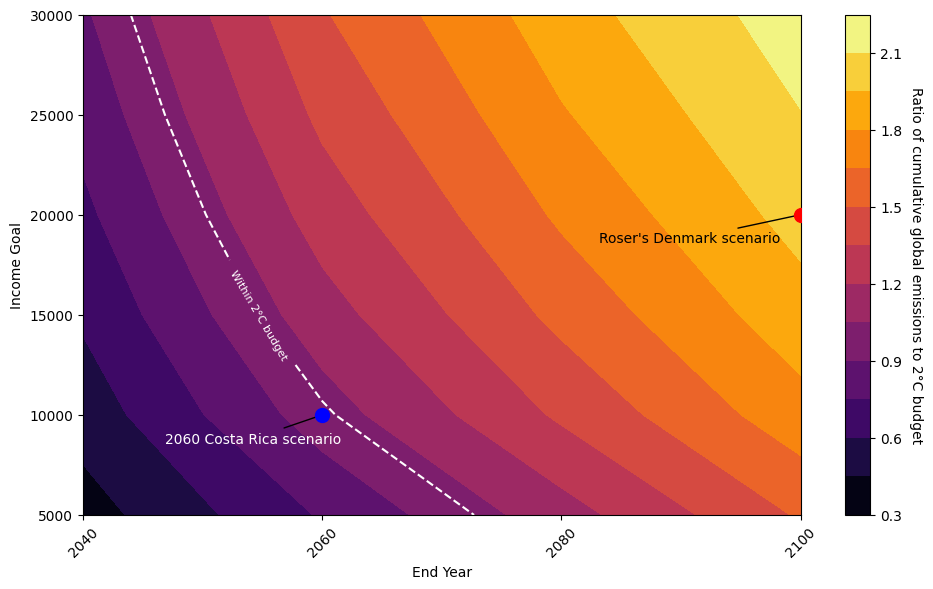

In [6]:
# calculate how much emissions are emitted in a given scenario run and how far above this is the carbon budget by summing the yearly emissions of all countries
from scenariosweeper_class import ScenarioSweeper


# Example usage:
end_year_values = [2040, 2060, 2080, 2100]
income_goal_values = [5000, 10000, 15000, 20000, 25000, 30000]
carbon_budget_values = [1150]
gdp_assumption_values = ["constant_ratio"]
pop_growth_assumption_values = ["semi_log_model"]
sweeper1 = ScenarioSweeper(end_year_values, income_goal_values, carbon_budget_values, gdp_assumption_values, pop_growth_assumption_values)
output1 = sweeper1.run_scenarios()

# Capture the figure and axes objects
fig, ax = sweeper1.plot_total_emissions_trade_off(output1, ["end_year", "income_goal"])

# Adjust the figure layout to be tight and save the figure at 300 DPI with minimal margins
fig.tight_layout()
fig.savefig("fig1.png", dpi=300, bbox_inches='tight')

# If you want to display the figure in an external plotting context
plt.show(fig)



### Run Roser and Costa Rica scenario and look at economic growth rates distribution in each scenario, as well as the distribution of fair share overshoots per country in costa rica and roser scenario

In [7]:
# set up a costa rica scenario
scenario_params_cr = {"end_year": 2060,
                   "income_goal": 10000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "gdp_assumption": "constant_ratio", #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "UN_medium" #this is a string and either (1) UN_medium or (2) semi_log_model for details see the scenario_class.py file
            }


# set up a denmark scenario
scenario_params_dk = {"end_year": 2100,
                   "income_goal": 20000, # in terms of 2017 USD PPP disposable household income per capita (the delineation between income and cons. exp is not necessarily clear)
                   "carbon_budget": 1100, # in terms of GtCO2 that is gigatons of CO2        
                   "gdp_assumption": "constant_ratio", #this is a string and either (1) constant_ratio or (2) model_ratio for details see the scenario_class.py file         
                   "pop_growth_assumption": "UN_medium" #this is a string and either (1) UN_medium or (2) semi_log_model for details see the scenario_class.py file
            }


# run the costa rica scenario
scenario_cr = Scenario(scenario_params_cr)
scenario_cr.run()


# run the denmark scenario
scenario_dk = Scenario(scenario_params_dk)
scenario_dk.run()

